In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
print(df_city.head())
#df_ride = pd.read_csv()
df_ride = pd.read_csv(ride_data_to_load)
print(df_ride.head())

# Combine the data into a single dataset
df = pd.merge(df_ride,df_city,on="city",how="left")

# Display the data table for preview
df.head()

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

           city  driver_count   type   Avg Fare  Tot Num Rides
0   Richardfort            38  Urban  22.373214             28
1  Williamsstad            59  Urban  24.362174             23
2   Port Angela            67  Urban  23.836842             19
3    Rodneyfort            34  Urban  28.616957             23
4   West Robert            39  Urban  25.123871             31


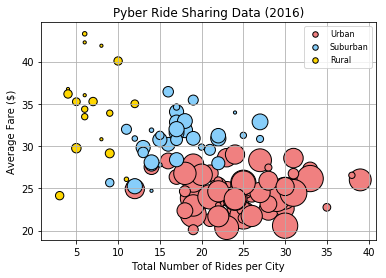

In [3]:
# Obtain the x and y coordinates for each of the three city types


df_ride_gr = df_ride.groupby(["city"],as_index=False)
df_AvgFare = pd.DataFrame(df_ride_gr["fare"].mean())
df_AvgFare = df_AvgFare.rename(columns={"fare":"Avg Fare"})
df_NumRides = pd.DataFrame(df_ride_gr["ride_id"].count())
df_NumRides = df_NumRides.rename(columns={"ride_id":"Tot Num Rides"})

df = pd.merge(df_city,df_AvgFare,on="city",how="outer")
df = pd.merge(df,df_NumRides,on="city",how="outer")

print(df.head())

df_Urban = df.loc[df["type"]=="Urban"]
df_Suburban = df.loc[df["type"]=="Suburban"]
df_Rural = df.loc[df["type"]=="Rural"]

# Build the scatter plots for each city types
# Incorporate a text label regarding circle size

Urban_chrt = plt.scatter(df_Urban["Tot Num Rides"], df_Urban["Avg Fare"], s=10*df_Urban["driver_count"],
                         facecolors="lightcoral",marker="o", edgecolors="black")
Subrban_chrt = plt.scatter(df_Suburban["Tot Num Rides"], df_Suburban["Avg Fare"], s=10*df_Suburban["driver_count"],
                           facecolors="lightskyblue",marker="o", edgecolors="black")
Rural_chrt =plt.scatter(df_Rural["Tot Num Rides"], df_Rural["Avg Fare"], s=10*df_Rural["driver_count"],
                        facecolors="gold",marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend([Urban_chrt, Subrban_chrt,Rural_chrt],["Urban","Suburban","Rural"], scatterpoints=1, loc="upper right",
          ncol=1,fontsize=8)

# to get the legend markers of the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Save Figure
plt.savefig("PyberBubble.png")

plt.show()

## Total Fares by City Type

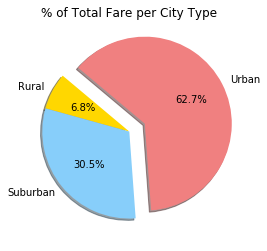

In [4]:
# Calculate Type Percents
df["Tot Fare"] =  df["Avg Fare"]*df["Tot Num Rides"]
df["Tot Fare %"] =  df["Tot Fare"]/df["Tot Fare"].sum()
df["Tot Rides %"] =  df["Tot Num Rides"]/df["Tot Num Rides"].sum()
df["Tot Drivers %"] =  df["driver_count"]/df["driver_count"].sum()
df.head()

df_gr = df.groupby(["type"],as_index=False)
df_gr_TotFare = pd.DataFrame(df_gr["Tot Fare %"].sum())
df_gr_TotRides = pd.DataFrame(df_gr["Tot Rides %"].sum())
df_gr_Drivers =  pd.DataFrame(df_gr["Tot Drivers %"].sum())

df_pie = pd.merge(df_gr_TotFare,df_gr_TotRides,on="type",how="outer")
df_pie = pd.merge(df_pie,df_gr_Drivers,on="type",how="outer")

# Build Pie Chart

colors = ["gold","lightskyblue","lightcoral"]
explode = (0.0, 0, 0.2)

plt.pie(df_pie["Tot Fare %"], explode=explode, labels=df_pie["type"],colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.0)
#plt.axis("equal")
plt.title("% of Total Fare per City Type")

# Save Figure
plt.savefig("PyberPieTotFare.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

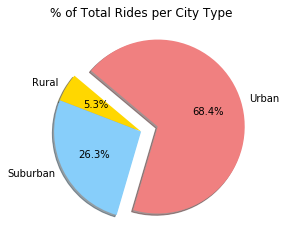

In [6]:
# Calculate Ride Percents

# Build Pie Chart

plt.pie(df_pie["Tot Rides %"], explode=explode, labels=df_pie["type"],colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.0)
#plt.axis("equal")
plt.title("% of Total Rides per City Type")

# Save Figure
plt.savefig("PyberPieTotFare.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

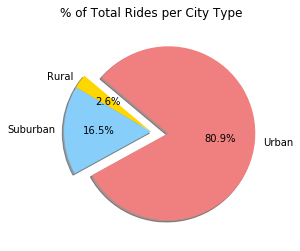

In [8]:
# Calculate Driver Percents

# Build Pie Charts
plt.pie(df_pie["Tot Drivers %"], explode=explode, labels=df_pie["type"],colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.0)
#plt.axis("equal")
plt.title("% of Total Rides per City Type")

# Save Figure
plt.savefig("PyberPieTotFare.png")

In [9]:
# Show Figure
plt.show()